
# سوال ۶: تبدیل فوریه سیگنال سینوسی

سیگنال x(t) = cos(2πt) را در نظر بگیرید.  
۱. تبدیل فوریه این سیگنال را از نظر تئوری توضیح دهید.  
۲. سپس آن را با استفاده از FFT به صورت عددی محاسبه کرده و طیف فرکانسی آن را رسم کنید.


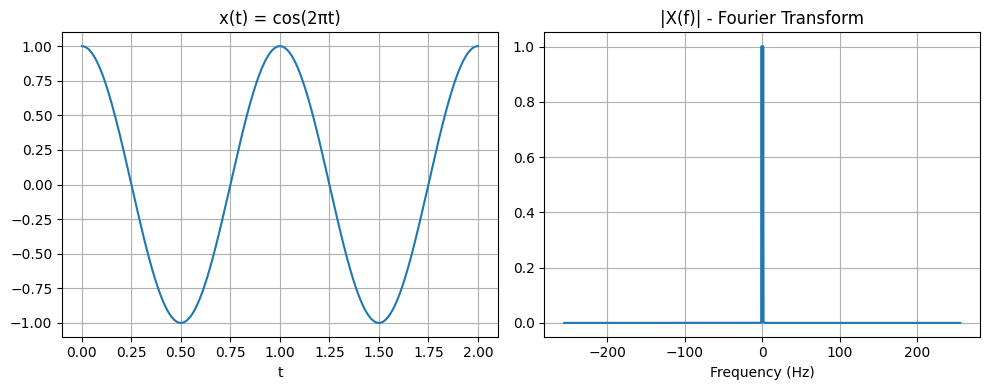

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

t = np.linspace(0, 2, 1024)
x = np.cos(2 * np.pi * t)

dt = t[1] - t[0]
f = fftshift(fftfreq(len(t), dt))
X = fftshift(fft(x)) * dt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x)
plt.title("x(t) = cos(2πt)")
plt.xlabel("t")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(f, np.abs(X))
plt.title("|X(f)| - Fourier Transform")
plt.xlabel("Frequency (Hz)")
plt.grid(True)
plt.tight_layout()
plt.show()



# سوال ۷: تأخیر زمانی سیگنال

سیگنال x(t) = e^(-t) * u(t) را در نظر بگیرید.  
سیگنال y(t) = x(t - 2) را بسازید.  
۱. نمودار هر دو سیگنال را در بازه t ∈ [0, 10] رسم کنید.  
۲. تفاوت زمانی آنها را توضیح دهید.


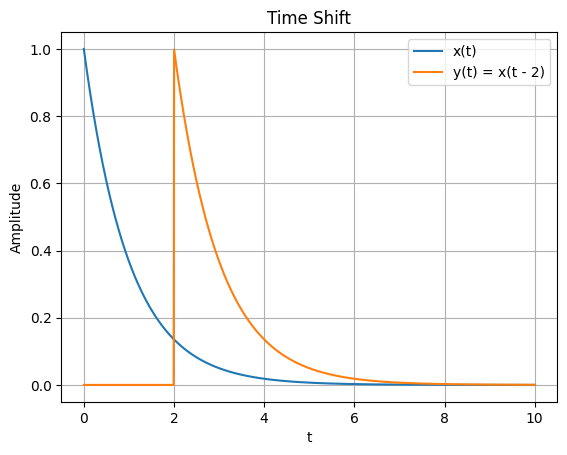

In [2]:

t = np.linspace(0, 10, 1000)
x = np.exp(-t)
y = np.exp(-(t - 2)) * (t >= 2)

plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t) = x(t - 2)')
plt.title("Time Shift")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()



# سوال ۸: تفکیک سیگنال به مولفه‌های فرد و زوج

تابع سیگنال x(t) = e^(−|t|) را در نظر بگیرید.  
۱. مولفه زوج و مولفه فرد این سیگنال را محاسبه کنید.  
۲. نمودار سیگنال اصلی و دو مولفه‌اش را رسم کنید.


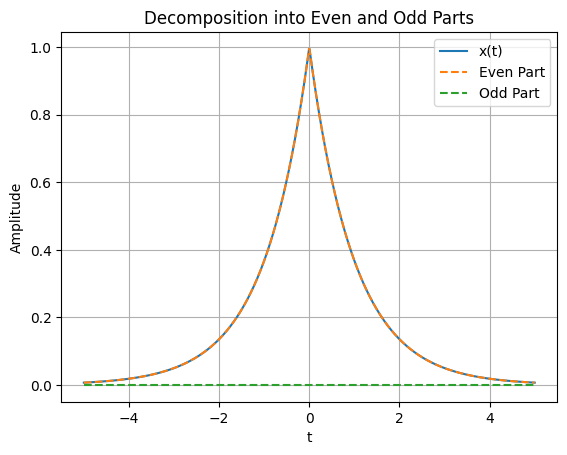

In [3]:

t = np.linspace(-5, 5, 1000)
x = np.exp(-np.abs(t))

x_even = 0.5 * (x + x[::-1])
x_odd = 0.5 * (x - x[::-1])

plt.plot(t, x, label='x(t)')
plt.plot(t, x_even, '--', label='Even Part')
plt.plot(t, x_odd, '--', label='Odd Part')
plt.title("Decomposition into Even and Odd Parts")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()



# سوال ۹: بررسی تقارن زمانی سیستم

یک سیستم LTI دارای پاسخ ضربه‌ای h(t) = e^(−t) * u(t) است.  
اگر ورودی x(t) = δ(t − 1) باشد:  
۱. خروجی سیستم را محاسبه و رسم کنید.  
۲. این نتیجه چه ارتباطی با ویژگی انتقال زمانی دارد؟


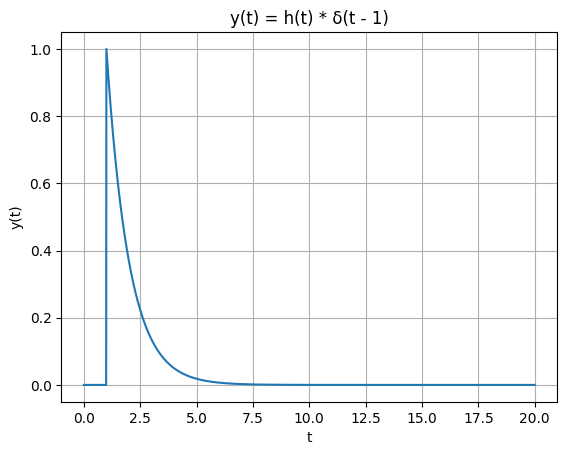

In [4]:

t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]

# h(t)
h = np.exp(-t)

# x(t) = δ(t - 1)
x = np.zeros_like(t)
x[np.argmin(np.abs(t - 1))] = 1 / dt  # Approximation of delta

y = np.convolve(x, h) * dt
t_y = np.linspace(0, 2 * t[-1], len(y))

plt.plot(t_y, y)
plt.title("y(t) = h(t) * δ(t - 1)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()



# سوال ۱۰: بررسی سیستم پایدار و ناپایدار

برای هر کدام از پاسخ‌های ضربه‌ای زیر مشخص کنید که سیستم پایدار هست یا نه:  
الف) h(t) = e^(−t) * u(t)  
ب) h(t) = e^(t) * u(t)  
سپس نمودار هر دو را رسم کرده و تفاوت را بررسی کنید.


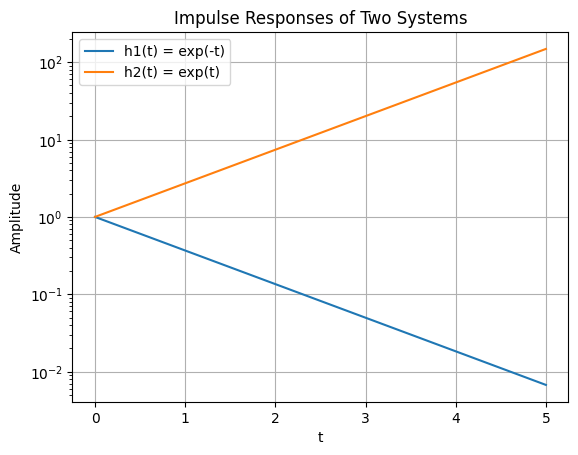

In [5]:

t = np.linspace(0, 5, 1000)
h1 = np.exp(-t)  # پایدار
h2 = np.exp(t)   # ناپایدار

plt.plot(t, h1, label='h1(t) = exp(-t)')
plt.plot(t, h2, label='h2(t) = exp(t)')
plt.title("Impulse Responses of Two Systems")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.yscale("log")
plt.show()
